<a href="https://colab.research.google.com/github/PratyushaChatterjee/TAI-IP/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/My Drive//Stock Market Prediction/TCS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [ ]:
print(data.isnull().sum())

# Handle missing values by filling them with the mean of the respective column
data.fillna(data.mean(), inplace=True)

Date         0
Open         8
High         8
Low          8
Close        8
Adj Close    8
Volume       8
dtype: int64


<ipython-input-29-dce546d2262a>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
data1=data.reset_index()['Close']
data1

0        120.332497
1        123.345001
2        123.512497
3        123.487503
4        124.207497
           ...     
4489    3144.699951
4490    3121.850098
4491    3157.300049
4492    3137.399902
4493    3161.699951
Name: Close, Length: 4494, dtype: float64

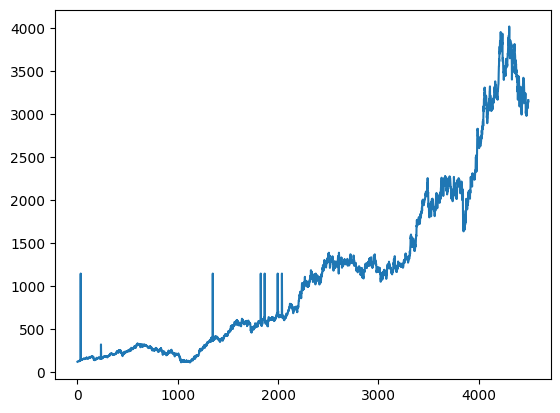

In [ ]:

plt.plot(data1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))


In [ ]:
(data1)

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.77944266],
       [0.77434998],
       [0.78056864]])

In [ ]:
training_size=int(len(data1)*0.8)
test_size=len(data1)-training_size


In [ ]:
train_data,test_data=data1[0:training_size],data1[training_size:len(data1):1]

In [ ]:
training_size,test_size

(3595, 899)

In [ ]:
train_data

array([[0.00224754],
       [0.00301848],
       [0.00306134],
       ...,
       [0.47904084],
       [0.482099  ],
       [0.48023084]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step),0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step,0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
time_step=100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape), print(y_train.shape)


(3494, 100)
(3494,)


(None, None)

In [ ]:

print(X_test.shape),print(y_test.shape)

(798, 100)
(798,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1 )
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] ,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
55/55 [==============================] - 14s 252ms/step - loss: 1.9546e-04 - val_loss: 0.0011
Epoch 2/50
55/55 [==============================] - 14s 265ms/step - loss: 1.4111e-04 - val_loss: 0.0019
Epoch 3/50
55/55 [==============================] - 15s 271ms/step - loss: 1.3394e-04 - val_loss: 0.0024
Epoch 4/50
55/55 [==============================] - 12s 224ms/step - loss: 1.2894e-04 - val_loss: 0.0015
Epoch 5/50
55/55 [==============================] - 12s 225ms/step - loss: 1.2913e-04 - val_loss: 0.0014
Epoch 6/50
55/55 [==============================] - 13s 227ms/step - loss: 1.3576e-04 - val_loss: 0.0033
Epoch 7/50
55/55 [==============================] - 13s 239ms/step - loss: 1.2936e-04 - val_loss: 0.0013
Epoch 8/50
55/55 [==============================] - 13s 242ms/step - loss: 1.3416e-04 - val_loss: 9.6953e-04
Epoch 9/50
55/55 [==============================] - 13s 240ms/step - loss: 1.2798e-04 - val_loss: 0.0014
Epoch 10/50
55/55 [==============================] 

In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 [==============================] - 2s 64ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.007977864247417149

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.01421981733407981

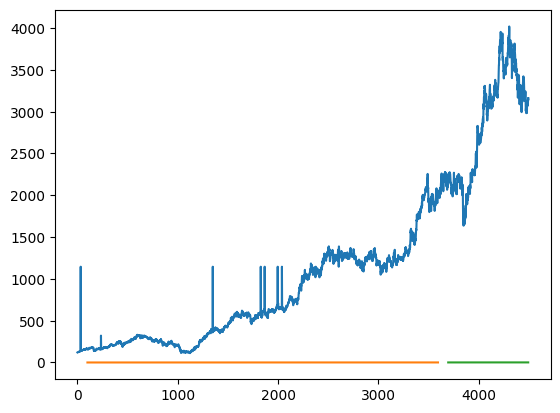

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

899

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 558)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5539205911418721,
 0.5548034734965581,
 0.5552896803880278,
 0.5483160902804599,
 0.5471772963621934,
 0.5496852422249486,
 0.5621225692942929,
 0.5588596968586419,
 0.5556479941960404,
 0.5549058130426572,
 0.5491350574425838,
 0.5483928762892006,
 0.5452451515174942,
 0.5481241566077746,
 0.5523083357516485,
 0.5489431237698985,
 0.5479834554064716,
 0.5468958312612546,
 0.5467678754794645,
 0.5453731072992845,
 0.5481497728434658,
 0.5468445987898721,
 0.5443239075076043,
 0.5491094412068925,
 0.5463200302431986,
 0.5511311174798451,
 0.5599217047681677,
 0.5571834635775232,
 0.5669720808844764,
 0.5723845853748702,
 0.5671255902036249,
 0.5680212806761565,
 0.5790127324906044,
 0.6090311087399278,
 0.6090311087399278,
 0.6119997079567946,
 0.6012386141685689,
 0.5984107788513381,
 0.6023518545494772,
 0.6171051311105584,
 0.602902039331842,
 0.5683028084754282,
 0.5913476573155168,
 0.5923713035698387,
 0.6082633740491864,
 0.60926146676615,
 0.6172330868923487,
 0.6638985855905

In [ ]:
# Assuming you have already imported the required libraries and defined the model.

from numpy import array

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        # Prepare the input data for prediction
        x_input = np.array(temp_input[-n_steps:])  # Take the last 100 elements
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat[0, 0]))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat[0, 0]))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())

    i += 1

print(lst_output)


0 day input [0.78669864 0.78684551 0.78699279 0.78713977 0.78728694 0.7874344
 0.78758174 0.78772914 0.78787673 0.78802443 0.78817207 0.78831995
 0.78846788 0.78861612 0.7887643  0.78891248 0.78906107 0.78920943
 0.78935802 0.78950655 0.78965533 0.78980404 0.78995293 0.79010171
 0.7902506  0.79039937 0.79054821 0.79069698 0.79084587 0.79099452
 0.79114354 0.79129231 0.79144132 0.79158998 0.79173881 0.79188752
 0.79203641 0.79218501 0.79233372 0.7924825  0.79263079 0.79277945
 0.79292798 0.79307652 0.79322487 0.79337353 0.79352182 0.79367018
 0.79381853 0.79396695 0.79411536 0.79426342 0.79441172 0.79455984
 0.79470831 0.79485613 0.79500437 0.79515266 0.79530066 0.79544878
 0.79559702 0.79574502 0.79589307 0.79604107 0.79618907 0.79633689
 0.79648507 0.79663289 0.79678077 0.7969287  0.79707634 0.79722428
 0.79737204 0.79751962 0.79766738 0.79781485 0.79796237 0.79810983
 0.79825729 0.79840481 0.79855233 0.79869968 0.79884714 0.79899436
 0.79914188 0.79928917 0.79943645 0.79958373 0.7997

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [ ]:
len(data1)

4494

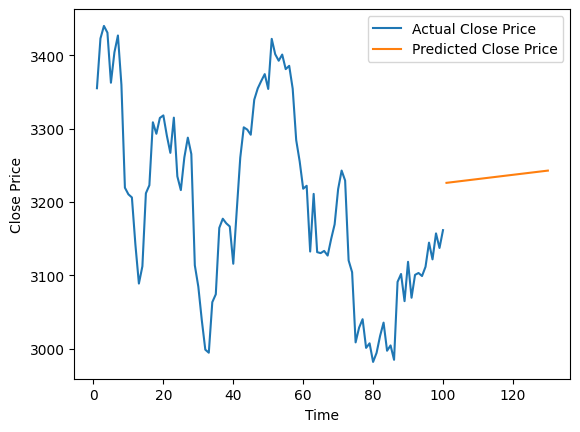

In [ ]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

plt.plot(day_new, scaler.inverse_transform(data1[-100:]), label='Actual Close Price')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


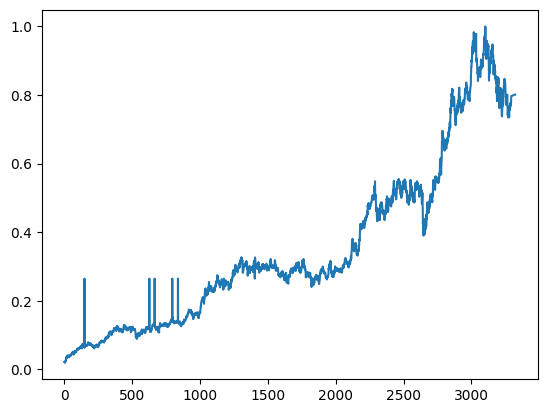

In [ ]:
data3=data1.tolist()
data3.extend(lst_output)
plt.plot(data3[1200:])

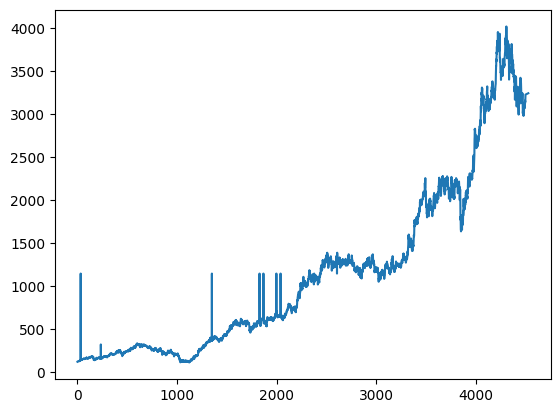

In [ ]:
data3=scaler.inverse_transform(data3).tolist()
plt.plot(data3)